In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Select dataset

In [2]:
datasets = [
  data.airports,         # 0  184.7 KB  Rows: 3376
  data.anscombe,         # 1    1.1 KB  Rows:   44
  data.barley,           # 2    3.8 KB  Rows:  120
  data.burtin,           # 3    0.8 KB  Rows:   16
  data.cars,             # 4   28.6 KB  Rows:  406
  data.crimea,           # 5    0.8 KB  Rows:   24
  data.driving,          # 6    1.8 KB  Rows:   55
  data.iowa_electricity, # 7    1.3 KB  Rows:   51
  data.iris,             # 8    5.9 KB  Rows:  150
  data.la_riots,         # 9    5.5 KB  Rows:   63
  data.seattle_temps,    # 10 136.9 KB  Rows: 8759
  data.seattle_weather,  # 11  68.6 KB  Rows: 1461
  data.sf_temps,         # 12 136.9 KB  Rows: 8759
  data.stocks,           # 13  13.2 KB  Rows:  560
  data.us_employment,    # 14  22.6 KB  Rows:  120
  data.wheat             # 15   1.3 KB  Rows:   52
]

In [3]:
dataset  = datasets[11] ###### CHANGE THE NUMBER
data_url = dataset.url
data_df  = dataset()

data_df.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

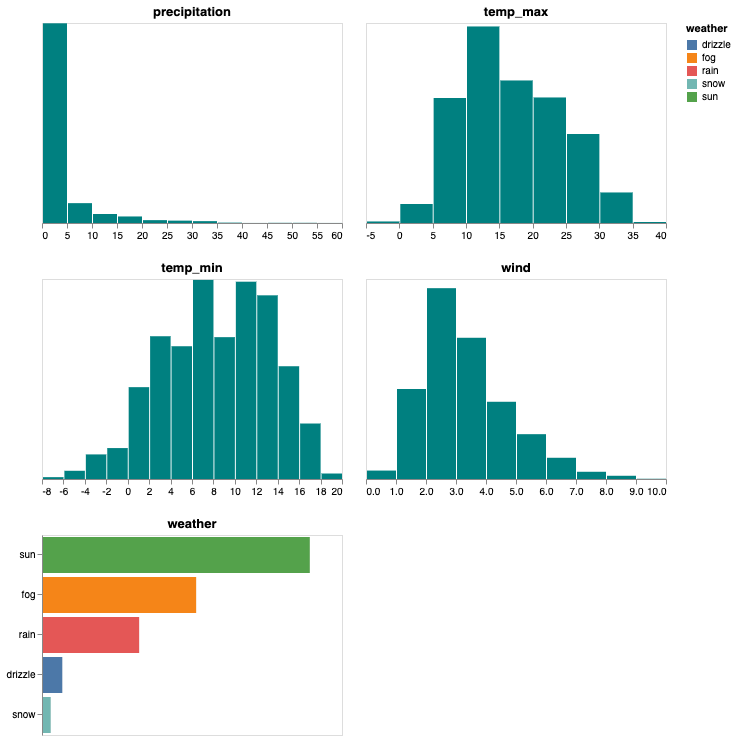

In [8]:
def get_varNames(df): return df.columns.values.tolist()
def get_varTypes(df):
    types = [dtype.name for dtype in df.dtypes.values.tolist()]
    types = [t.replace('object',         'cat')  for t in types]
    types = [t.replace('category',       'cat')  for t in types]
    types = [t.replace('bool',           'cat')  for t in types]
    types = [t.replace('int64',          'num')  for t in types]
    types = [t.replace('float64',        'num')  for t in types]
    types = [t.replace('datetime64[ns]', 'date') for t in types]
    types = [t.replace('timedelta[ns]',  'date') for t in types]
    return types


def chart_base(varName):
    return alt.Chart().mark_bar().properties(
        width=300, height=200,
        title=varName
    )

def chart_numerical(varName):
    return chart_base(varName).encode(
        x=alt.X(varName, type='quantitative', bin=alt.Bin(maxbins=16), title=None),
        y=alt.Y('count()', axis=None)
    )

def chart_categorical(varName):
    return chart_base(varName).encode(
        x=alt.X('count()', axis=None),
        y=alt.Y(varName, type='nominal', title=None,
            sort=alt.EncodingSortField(field=varName, op="count", order="descending")),
    )


def univariate_charts(df, data_url, include_num=True, include_cat=True, include_date=False):
    allVarNames = get_varNames(df)
    allVarTypes = get_varTypes(df)
    
    varNames = []
    varTypes = []
    charts   = []
    filters  = []
    
    # 1) Generate charts and filters
    for varName, varType in zip(allVarNames, allVarTypes):
        if include_num and varType=="num":
            varNames.append(varName)
            varTypes.append(varType)
            charts.append(chart_numerical(varName))
            filters.append(alt.selection_interval(name=varName, encodings=['x']))
        elif include_cat and varType=="cat":
            varNames.append(varName)
            varTypes.append(varType)
            charts.append(chart_categorical(varName))
            filters.append(alt.selection_multi(name=varName, encodings=['y']))
    
    # 2) Crossfilter charts
    filteredCharts = []
    for (chart, myFilter, varName, varType) in zip(charts, filters, varNames, varTypes):
        # Colors
        if varType=="num":
            background = chart.mark_bar(color='teal', opacity=0.15)
            highlight  = chart.mark_bar(color='teal')

        if varType=="cat":
            background = chart.mark_bar(color='lightgray')
            highlight  = chart.encode(color=varName + ":N")

        # Add my filter to modify others
        background = background.add_selection(myFilter)

        # Add others filters that modify me
        for f in filters: highlight = highlight.transform_filter(f)

        filteredCharts.append(alt.layer(background, highlight))
    
    return alt.concat(*filteredCharts, data=data_url, columns=2)


univariate_charts(data_df, data_url)

In [11]:
Cat_and_num_vars = data_df
data_df[].to_dict('records')

[{'date': Timestamp('2012-01-01 00:00:00'),
  'precipitation': 0.0,
  'temp_max': 12.8,
  'temp_min': 5.0,
  'wind': 4.7,
  'weather': 'drizzle'},
 {'date': Timestamp('2012-01-02 00:00:00'),
  'precipitation': 10.9,
  'temp_max': 10.6,
  'temp_min': 2.8,
  'wind': 4.5,
  'weather': 'rain'},
 {'date': Timestamp('2012-01-03 00:00:00'),
  'precipitation': 0.8,
  'temp_max': 11.7,
  'temp_min': 7.2,
  'wind': 2.3,
  'weather': 'rain'},
 {'date': Timestamp('2012-01-04 00:00:00'),
  'precipitation': 20.3,
  'temp_max': 12.2,
  'temp_min': 5.6,
  'wind': 4.7,
  'weather': 'rain'},
 {'date': Timestamp('2012-01-05 00:00:00'),
  'precipitation': 1.3,
  'temp_max': 8.9,
  'temp_min': 2.8,
  'wind': 6.1,
  'weather': 'rain'},
 {'date': Timestamp('2012-01-06 00:00:00'),
  'precipitation': 2.5,
  'temp_max': 4.4,
  'temp_min': 2.2,
  'wind': 2.2,
  'weather': 'rain'},
 {'date': Timestamp('2012-01-07 00:00:00'),
  'precipitation': 0.0,
  'temp_max': 7.2,
  'temp_min': 2.8,
  'wind': 2.3,
  'weather':

In [9]:
univariate_charts(data_df, data_df).to_dict()

{'config': {'view': {'width': 400, 'height': 300}, 'mark': {'tooltip': None}},
 'concat': [{'layer': [{'mark': {'type': 'bar',
      'color': 'teal',
      'opacity': 0.15},
     'encoding': {'x': {'type': 'quantitative',
       'bin': {'maxbins': 16},
       'field': 'precipitation',
       'title': None},
      'y': {'type': 'quantitative', 'aggregate': 'count', 'axis': None}},
     'height': 200,
     'selection': {'precipitation': {'type': 'interval', 'encodings': ['x']}},
     'title': 'precipitation',
     'width': 300},
    {'mark': {'type': 'bar', 'color': 'teal'},
     'encoding': {'x': {'type': 'quantitative',
       'bin': {'maxbins': 16},
       'field': 'precipitation',
       'title': None},
      'y': {'type': 'quantitative', 'aggregate': 'count', 'axis': None}},
     'height': 200,
     'title': 'precipitation',
     'transform': [{'filter': {'selection': 'precipitation'}},
      {'filter': {'selection': 'temp_max'}},
      {'filter': {'selection': 'temp_min'}},
      {

# Large dataset (CSV of 3.72 MB, 32560 rows)

In [5]:
alt.data_transformers.disable_max_rows()

df_big = pd.read_csv("files/bigDataset.csv")
df_big = df_big.head(10000)

mem = df_big.memory_usage().sum() / 1024**2
print("Size:", round(mem,2), "MB")
print("Rows:", len(df_big))
df_big.head()

Size: 1.14 MB
Rows: 10000


39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

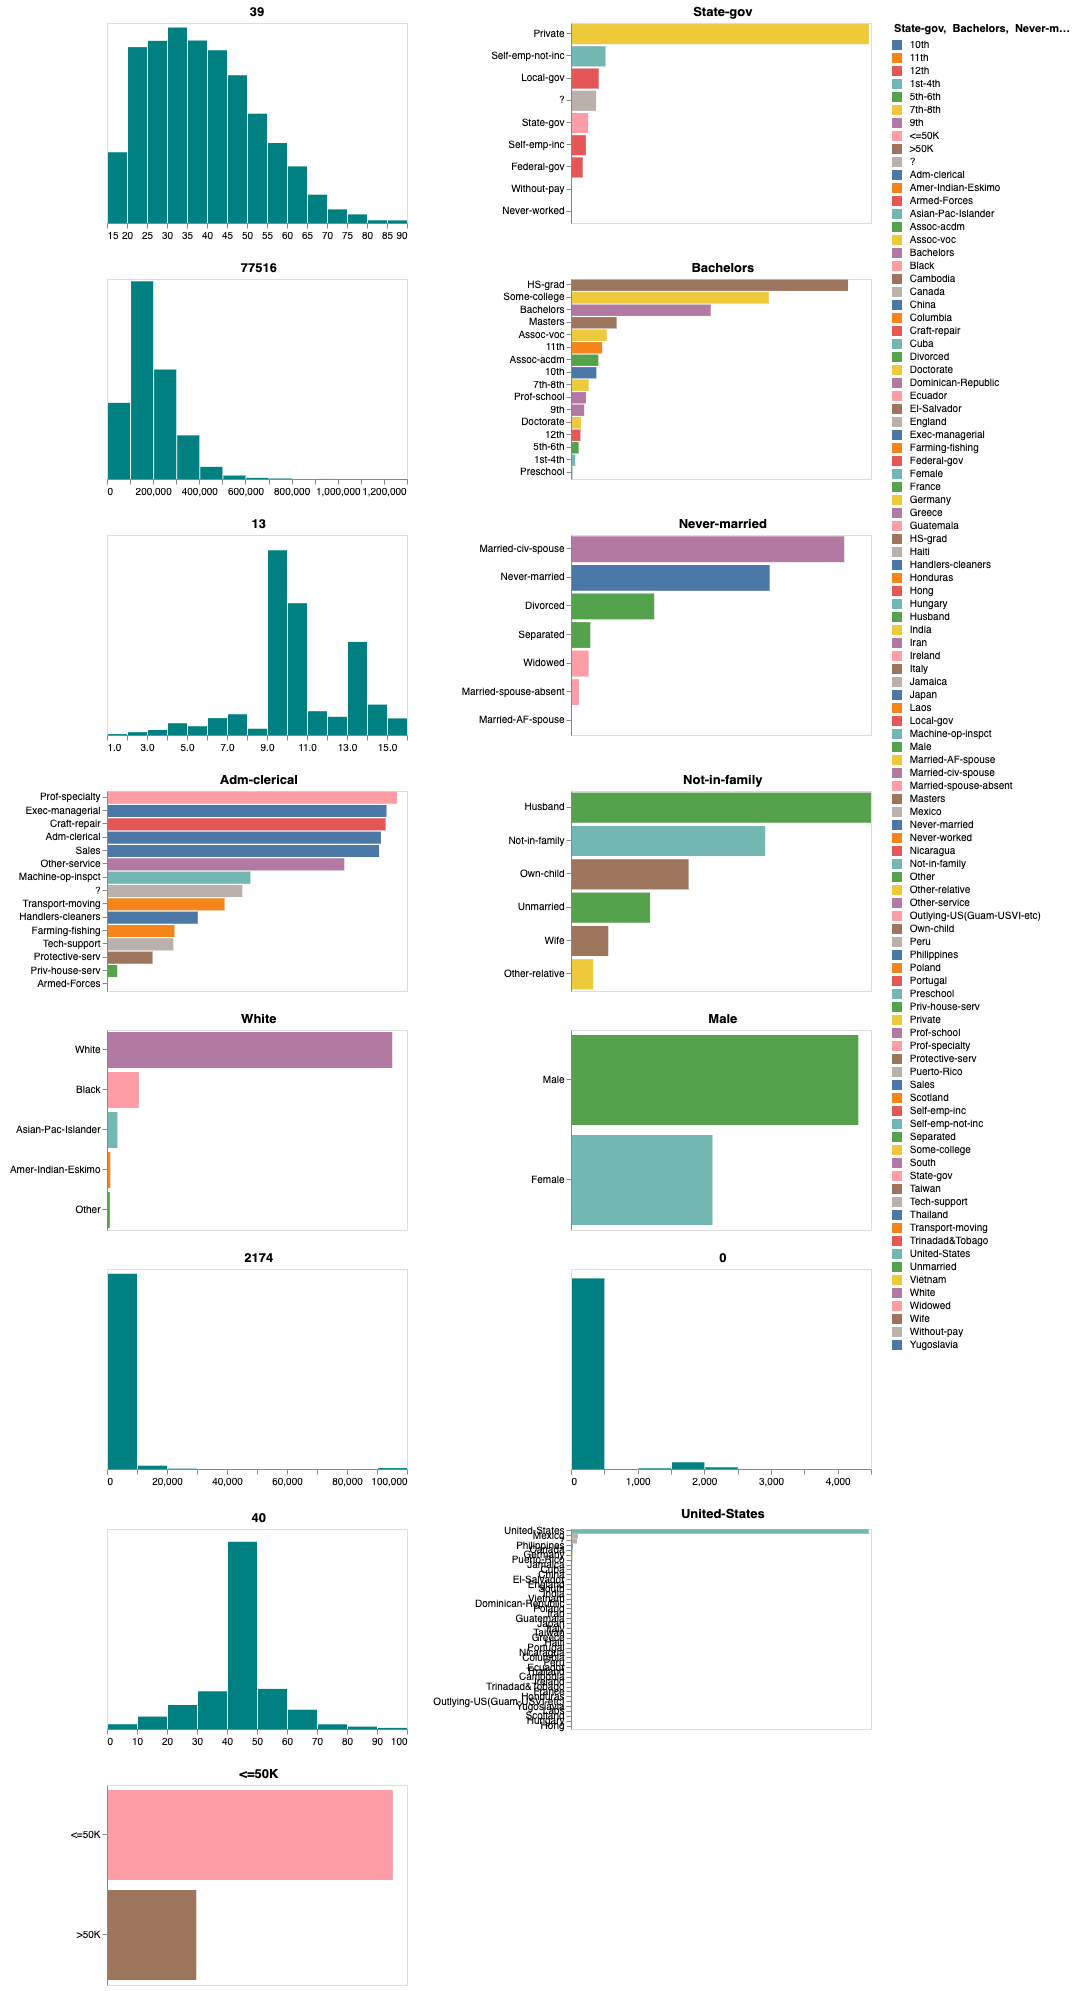

In [6]:
univariate_charts(df_big, df_big)